In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def rgb_to_mono(img, t):
    mono_img = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            mono_img[i][j] = sum(img[i][j]) / (255. * 3.) < t
    return mono_img

In [34]:
def mono_to_ts(img):
    y = np.zeros((img.shape[0]))
    x = np.zeros((img.shape[1]))
    for i in range(img.shape[0]):
        y[i] = img.sum(axis=1)[i]
    for i in range(img.shape[1]):
        x[i] = img.sum(axis=0)[i]
    return x, y

In [4]:
def smooth(data, windowLength = 3) :  
    window = [] 
    newData = [] 
    for i in data :
        if len(window) < windowLength: 
            window += [i] 
        else: 
            window = window[1:] 
            window += [i] 
        newData += [np.mean(window)] 
    return np.array(newData)

In [5]:
def normalize(rawData) : 
    mean = np.mean(rawData) 
    sd   = np.std(rawData)
    normFunction = lambda q: (q - mean) / sd 
    normData = normFunction(rawData)
    return normData

In [11]:
def plot_graph(seriesList) : 
    for series in seriesList : 
        plt.plot(series) 
    plt.show()

In [7]:
def char_to_ts(img):
    d = np.asarray(img)
    d = rgb_to_mono(d, 0.5)
    x, y = mono_to_ts(d)
    x = normalize(x)
    y = normalize(y)
    x = smooth(x, 10)
    y = smooth(y, 10)
    return x, y

In [24]:
a = Image.open('data/a.jpg')
b = Image.open('data/b.jpg')

In [25]:
a_x, a_y = char_to_ts(a)
b_x, b_y = char_to_ts(b)

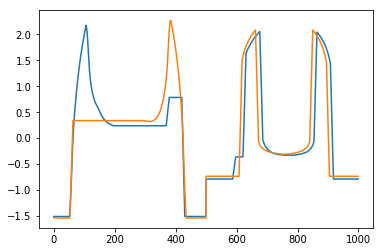

In [28]:
plot_graph([np.concatenate([a_x, a_y]), np.concatenate([b_x, b_y])])

In [27]:
p1 = np.asarray(Image.open('data/p1.png'))
p1 = rgb_to_mono(p1, 0.5)
p1_x, p1_y = mono_to_ts(p1)
n_p1_x = normalize(p1_x)
n_p1_y = normalize(p1_y)

In [28]:
s1 = np.asarray(Image.open('data/s1.png'))
s1 = rgb_to_mono(s1, 0.5)
s1_x, s1_y = mono_to_ts(s1)
n_s1_x = normalize(s1_x)
n_s1_y = normalize(s1_y)

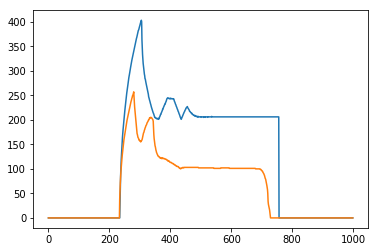

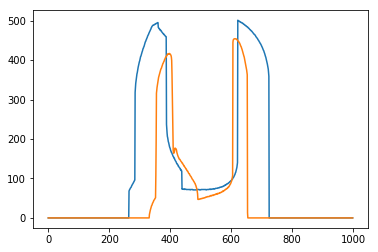

In [29]:
plot_graph([p1_x, s1_x])
plot_graph([p1_y, s1_y])

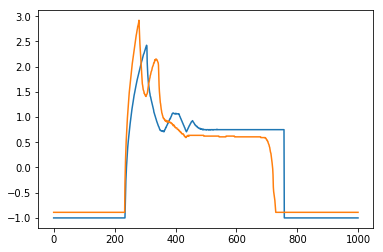

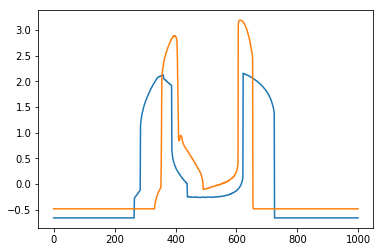

In [30]:
plot_graph([n_p1_x, n_s1_x])
plot_graph([n_p1_y, n_s1_y])

In [37]:
img = np.asarray(Image.open('IMG_2030.jpg'))
img = rgb_to_mono(img, 0.5)
img_x, img_y = mono_to_ts(img)
s1_img_x = normalize(img_x)
s10_img_x = smooth(s1_img_x, 10)
s20_img_x = smooth(s1_img_x, 20)

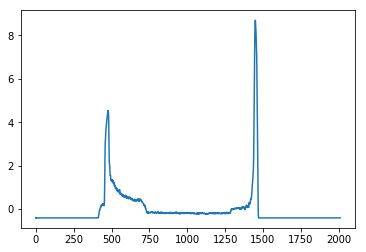

In [39]:
plot_graph([s1_img_x])

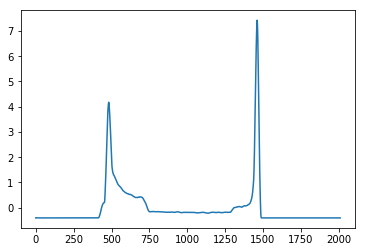

In [42]:
plot_graph([s20_img_x])

In [46]:
fonts = ['c', 'k', 's', 'p']
alps = ['1', '2', '3', '4']

In [44]:
def open_and_convert(name):
    img = Image.open(name)
    return char_to_ts(img)

1


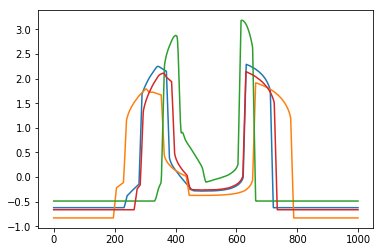

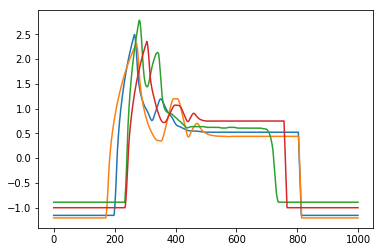

2


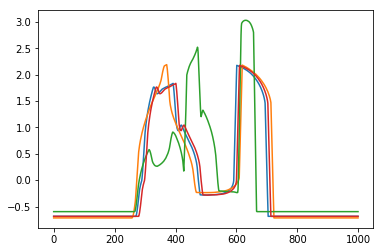

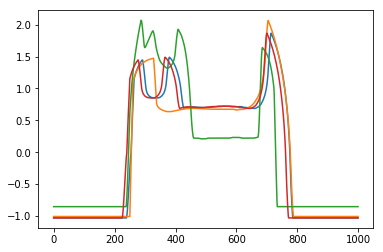

3


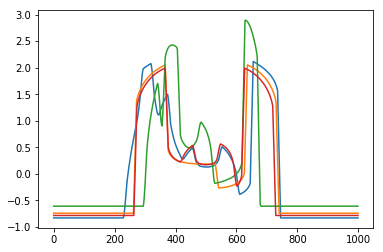

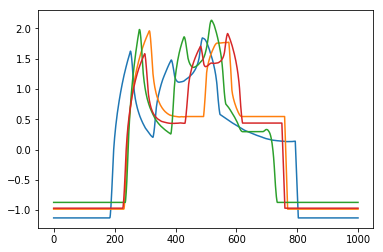

4


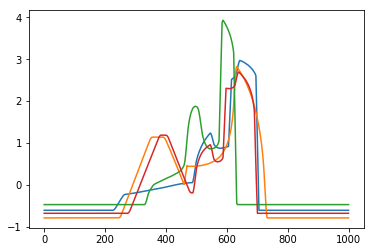

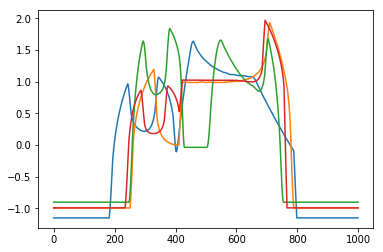

In [51]:
for alp in alps:
    print(alp)
    ts = [open_and_convert('data/' + font + alp + '.png') for font in fonts]
    plot_graph([t[0] for t in ts])
    plot_graph([t[1] for t in ts])

c


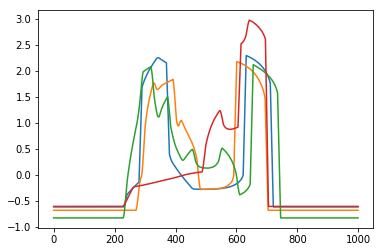

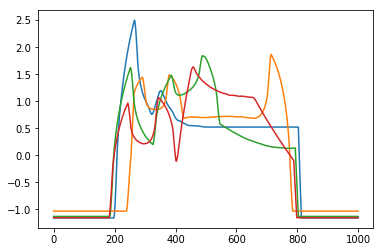

k


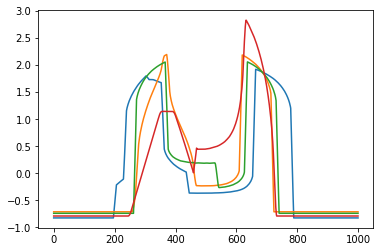

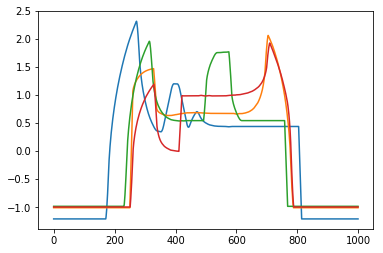

s


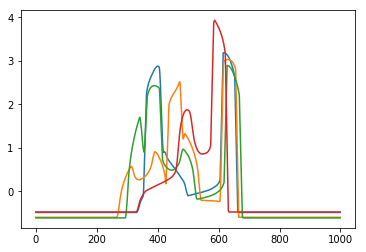

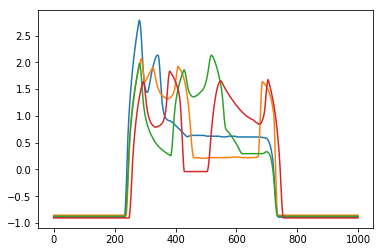

p


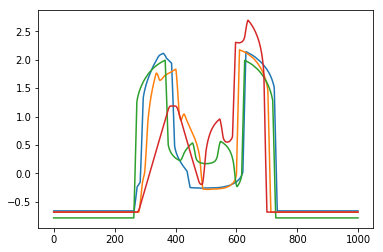

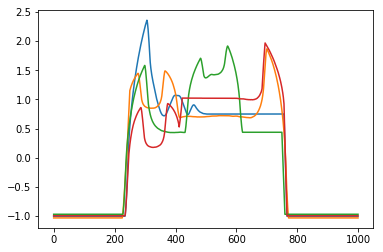

In [52]:
for font in fonts:
    print(font)
    ts = [open_and_convert('data/' + font + alp + '.png') for alp in alps]
    plot_graph([t[0] for t in ts])
    plot_graph([t[1] for t in ts])